In [42]:
import pandas as pd
import numpy as np
import re
import whois

In [43]:
base_df = pd.read_csv('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/data/dataset.csv')
print(base_df)

                                                     URL  URLType
0      http://mylust.com/videos/215137/my-raunchy-loo...        0
1      http://mic.com/articles/101766/one-perfect-twe...        0
2      http://stackexchange.com/newsletters/newslette...        0
3      http://bisaneema.org/%e0%a4%ad%e0%a4%be%e0%a4%...        1
4      http://skyrock.com/videos/eDJwODRhNzoxMw==-bug...        0
...                                                  ...      ...
46939  http://themeforest.net/item/artistas-modern-po...        0
46940  http://torcache.net/torrent/2EE5318B3923B273EF...        0
46941  http://grasslandhotel.com.vn/index.php/compone...        1
46942  http://conservativetribune.com/barack-obama-ju...        0
46943  http://sberbank.ru/moscow/ru/person/investment...        0

[46944 rows x 2 columns]


In [55]:
import datetime
from socket import *

def host_ft_extract(url):
    if not url:
        return
    
    feature_list = []
    url_dt = {}
    url_regex = '(?:http.*://)?(?P<host>[^:/ ]+).*'
    url_search = re.search(url_regex, url)
    hostname = url_search.group('host')

    try:
        domain = whois.whois(hostname)
    except whois.parser.PywhoisError:
        url_dt.update({
            "RegistryDate": pd.NaT,
            "ExpirationDate": pd.NaT,
            "HostCountry": None,
            "DomainAge": 0,
        })
        
        feature_list.append(url_dt)
        df = pd.DataFrame(feature_list)
        return df
    except timeout:
        url_dt.update({
            "RegistryDate": pd.NaT,
            "ExpirationDate": pd.NaT,
            "HostCountry": None,
            "DomainAge": 0,
        })
        
        feature_list.append(url_dt)
        df = pd.DataFrame(feature_list)
        
        return df
    except gaierror:
        url_dt.update({
            "RegistryDate": pd.NaT,
            "ExpirationDate": pd.NaT,
            "HostCountry": None,
            "DomainAge": 0,
        })
        
        feature_list.append(url_dt)
        df = pd.DataFrame(feature_list)
        
        return df
    except ConnectionResetError:
        url_dt.update({
            "RegistryDate": pd.NaT,
            "ExpirationDate": pd.NaT,
            "HostCountry": None,
            "DomainAge": 0,
        })
        
        feature_list.append(url_dt)
        df = pd.DataFrame(feature_list)
        
        return df
    except ConnectionRefusedError:
        url_dt.update({
            "RegistryDate": pd.NaT,
            "ExpirationDate": pd.NaT,
            "HostCountry": None,
            "DomainAge": 0,
        })
        
        feature_list.append(url_dt)
        df = pd.DataFrame(feature_list)
        
        return df
        
        
    reg_date = domain.creation_date
    if isinstance(reg_date, list):
        url_dt.update({"RegistryDate": reg_date[0]})
    elif (reg_date is None) or (reg_date == ""):
        url_dt.update({"RegistryDate": pd.NaT})
    else:
        try:
            url_dt.update({"RegistryDate": pd.to_datetime(reg_date)})
        except ValueError:
            url_dt.update({"RegistryDate": pd.NaT})

    exp_date = domain.expiration_date
    if isinstance(exp_date, list):
        url_dt.update({"ExpirationDate": exp_date[0]})
    elif (exp_date is None) or (exp_date == ""):
        url_dt.update({"ExpirationDate": pd.NaT})
    else:
        try:
            url_dt.update({"ExpirationDate": pd.to_datetime(exp_date)})
        except ValueError:
            url_dt.update({"ExpirationDate": pd.NaT})

    country = domain.country
    url_dt.update({"HostCountry": country})

    if pd.isnull(url_dt["RegistryDate"]):
        domain_age = 0
        url_dt.update({"DomainAge": domain_age})
    else:
        domain_age = datetime.datetime.now() - url_dt["RegistryDate"]
        age_in_days = domain_age.days
        url_dt.update({"DomainAge": age_in_days})

    feature_list.append(url_dt)
    df = pd.DataFrame(feature_list)
    
    return df

In [56]:
benign_df = base_df[base_df.URLType.eq(0)]
benign_df = benign_df[:1000]
benign_df.reset_index()

malicious_df = base_df[base_df.URLType.eq(1)]
malicious_df = malicious_df[:1000]
malicious_df.reset_index()

frames = [benign_df, malicious_df]
domain_df = pd.concat(frames)
domain_df = domain_df.sample(frac=1).reset_index(drop=True)
display(domain_df)

domain_df["URLType"].value_counts()
domain_df.to_csv('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/data/domain_urls.csv', index=False)

,URL,URLType
0,http://hotlinegsm.com/products/mobile-and-tabl...,1
1,http://emgn.com/tv/watch-he-wanted-a-job-at-sn...,0
2,http://distractify.com/post/related/id/55477f7...,0
3,http://olx.in/hi/m/item/laptop-80-gb-ide-hard-...,0
4,http://kenh14.vn/musik/hai-con-gai-cam-ly-lan-...,0
...,...,...
1995,http://www.js182.com/app/member/SportOption.ph...,1
1996,http://3cf.ru/2015/07/21/drygie-mvp-mirovoi-li...,1
1997,http://grasslandhotel.com.vn/index.php/tours/h...,1
1998,http://stackoverflow.com/questions/30062864/wh...,0


In [57]:
dataframe_list = []
for idx, row in domain_df.iterrows():
    print(row['URL'])
    feature_df = host_ft_extract(row['URL'])
    feature_df['URLType'] = row["URLType"]
    dataframe_list.append(feature_df)
    print(feature_df)
    
extracted_df = pd.concat(dataframe_list, ignore_index=True)
extracted_df.reset_index()
print(extracted_df)
extracted_df.to_csv('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/data/domain_base_featureset.csv', index=False)

http://hotlinegsm.com/products/mobile-and-tablet/sony-ericsson-xperia-neo-v-detail
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2020-02-16 21:07:51 2025-02-16 21:07:51          AE         43        1
http://emgn.com/tv/watch-he-wanted-a-job-at-snapchat-so-he-sent-them-his-my-story-instead-of-a-resume/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2004-06-20 18:57:38 2020-06-20 18:57:38          US       5762        0
http://distractify.com/post/related/id/55477f774a0c4b436e941a79/skip/20/limit/10/back/0
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2013-01-29 09:58:25 2021-01-29 09:58:25          US       2618        0
http://olx.in/hi/m/item/laptop-80-gb-ide-hard-disk-are-available-IDUV945.html?code=bd4a7dc7d3
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2006-02-22 11:21:13 2021-02-22 11:21:13          NL       5151        0
http://kenh14.vn/musik/hai-con-gai-cam-l

  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        1
http://adinamed.com/news/index.php?page=10&catid=0&myord=uptime&myshownums=&showtj=&showdate=&author=&key=
         RegistryDate      ExpirationDate           HostCountry  DomainAge  \
0 2016-02-20 19:31:47 2020-02-20 19:31:47  REDACTED FOR PRIVACY       1500   

   URLType  
0        1  
http://9779.info/%E6%88%91%E7%9A%84%E5%AE%B6%E5%9B%AD%E6%8A%98%E7%BA%B8%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://motthegioi.vn/ly-dich/tu-xem-duong-chi-tay-doan-biet-van-menh-tuong-lai-cua-minh-170879.html
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        0
http://industrialtrainingzirakpur.com/asp-dotnet-training-in-zirakpur.html
  RegistryDate ExpirationDate HostCount

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://3cf.ru/2015/07/20/smi-soobshili-o-planah-ssha-yjestochit-dostyp-kompanii-iz-rossii-k-zaimam/
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        1
http://momoshop.com.tw/category/LgrpCategory.jsp?l_code=2111600000&mdiv=1000900000-bt_5_023_11&ctype=B&mdiv=1000900000-bt_5_023_11&ctype=B
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0   2004-10-18     2022-10-27        None       5643        0
http://bisaneema.org/wp-content/plugins/easy-media-gallery/includes/js/mootools/easymedia.js?ver=3.9.6
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2016-06-27 04:48:43 2020-06-27 04:48:43          IN       1373        1
http://bdnews24.com/lifestyle/2015/05/02/extra-two-minutes-walking-can-add-years-to-your-life
         RegistryDat

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://thenextweb.com/apps/2011/07/24/the-complete-list-of-top-instagram-apps/instawar/gtm.js
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2008-08-02 19:06:27 2020-08-02 19:06:27          PA       4258        0
http://mic.com/articles/110832/jeb-bush-says-he-s-not-like-his-brother-don-t-believe-him
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1993-09-30 04:00:00 2025-09-29 04:00:00          US       9679        0
http://www.ilovespeedbumps.com/wp-content/themes/ifeature/core/css/foundation.css
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2011-11-28 12:25:06 2020-11-28 12:25:06          ZA       3046        1
http://wangqiao365.com/e/wap/show.php?classid=2&id=12&style=0&cpage=0&cid=2&bclassid=0
         RegistryDate      ExpirationDate           Host

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2012-03-06 20:59:19 2021-03-06 20:59:19          CN       2946        1
http://shop-pro.jp/func/%e7%84%a1%e6%96%99-%e3%82%a2%e3%82%a4%e3%82%b3%e3%83%b3%e3%83%bb%e7%b4%a0%e6%9d%90/
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        0
http://www.waihuift.com/img/aHR0cDovL3FxLmNpMTIzLmNvbS9waG90b3MvMjAxMS8wNi8xNy8xMzA4MjkyNjkxMTM2My5qcGc=.jpg
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2019-12-04 05:23:05 2020-12-04 05:23:05          CN        118        1
http://www.824555.com/cl/js/jquery-ui-1.8.21.custom.min.js?v=ver17.32
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2014-07-05 18:43:20 2021-07-05 18:43:20          US       2095        1
http://ecnavi.jp/redirect/?url=http://click.j-a-net.jp/161196/545434/UI%user_id%IT58305FR34
  RegistryDate ExpirationDate HostCountry  DomainAge 

  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        0
http://9779.info/%E5%A2%99%E5%A3%81%E8%B4%B4%E7%94%BB%E6%95%88%E6%9E%9C%E5%A4%A7%E5%9B%BE/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://sourceforge.net/directory/communications/add_facet_filter?facet=os&constraint=Other+Operating+Systems+%3A%3A+WinNT
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1999-08-08 04:48:02 2020-08-08 04:47:54          US       7541        0
http://seesaawiki.jp/pathofexile/d/%b9%b9%a4%ca%a4%eb%20Forsaken%20Masters%20%a4%ce%be%f0%ca%f3
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        0
http://9779.info/%E4%BC%9A%E5%8A%A8%E7%9A%84%E6%B0%B4%E6%9E%9C%E7%AE%80%E7%AC%94%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  D

  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        0
http://stackexchange.com/newsletters/newsletter?site=productivity.stackexchange.com
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2009-06-12 13:55:30 2020-06-12 13:55:30          US       3945        0
http://www.jin0044.com/cl/tpl/jin2015/ver1/css/jin2015.css?v=ver14.32
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2014-12-31 06:05:20 2021-12-31 06:05:20          US       1917        1
http://9779.info/%E5%89%AA%E8%B4%B4%E7%94%BB%E5%88%9B%E6%84%8F/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://www.yejs.cn/Article/UploadFiles/201202/20120210093947814.jpg
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2006-11-10 16:09:39 2020-11-10 16:09:39        None       4890        

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2014-12-31 06:05:20 2021-12-31 06:05:20          US       1917        1
http://wxztjz.com/e/public/onclick?enews=donews&classid=65&id=110
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2017-08-11 18:52:19 2020-08-11 18:52:19          CN        962        1
http://metro.co.uk/2012/12/17/games-release-schedule-new-releases-on-xbox-ps3-wii-and-more-350901/
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT     2028-06-17        None          0        0
http://www.mt6669.com/cl/tpl/montecarlo/ver1/css/montecarlo.css?v=ver16.32
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2015-04-04 11:44:50 2022-04-04 11:44:50          US       1823        1
http://grasslandhotel.com.vn/index.php/component/djcatalog2/items/fbtrack.js
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0 

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2005-04-28 00:32:00 2021-04-28 00:32:00          US       5451        0
http://www.newsvity.com/wp-includes/js/jquery/jquery.js?ver=1.11.2
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        1
http://clien.net/cs2/bbs/register.php?url=%2Fcs2%2Fbbs%2Fboard.php%3Fbo_table%3Dhongbo
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2001-10-26 06:29:51 2020-10-26 06:29:51          KR       6731        0
http://distractify.com/post/related/id/54414fa94a0c4bc10219be1b/skip/20/limit/10/back/0
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2013-01-29 09:58:25 2021-01-29 09:58:25          US       2618        0
http://twitter.com/home?status=%E3%83%8C%E3%81%91%E3%82%8B%EF%BC%81%E3%80%90%E3%82%A2%E3%83%8B%E3%83%A1%E3%80%91+http%3A%2F%2Fero-video.net%2Ft%2F9wpLTeudUsCftQxQ+%E9%9D%92%E8%91%89%E9%B3%B4

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1996-02-11 05:00:00 2022-02-12 05:00:00          KR       8815        0
http://techcrunch.com/2014/06/25/hands-on-with-googles-incredibly-clever-cardboard-virtual-reality-headset/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2005-06-10 22:56:20 2021-06-10 22:56:20          US       5407        0
http://www.pubyun.com/blog/other/dell-r720-%e7%9a%84%e6%b5%8b%e8%af%95/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2012-03-06 20:59:19 2021-03-06 20:59:19          CN       2946        1
http://fc2.com/careers/en/index.html?utm_source=fc2com_en_pc&utm_medium=left_menu_bnr&utm_campaign=v1_en
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1999-05-20 03:06:00 2028-05-20 03:06:36          CA       7621        0
http://thenextweb.com/apple/2015/03/20/apple-invites-good-morning-america-into-its-secret-apple-watch-fitness-lab/
        

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://3cf.ru/2015/07/20/analitiki-alfa-banka-predskazali-medlennyi-podem-ekonomiki-so-dna/
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        1
http://maybank2u.com.my/mbb_info/m2u/public/promoChannel.do?cntTypeId=1&channelId=PRO-Promotions&programId=PRO02-Cards:AmericanExpress&chCatId=/mbb/Personal/PRO-Promotions
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        0
http://teespring.com/it/balanceiskey?utm_campaign=balanceiskey&utm_medium=oembed&utm_source=wordpress
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2011-02-09 20:53:37 2021-02-09 20:53:37          US       3337        0
http://katproxy.com/fifty-shades-of-grey-2015-uncut-hc-hdrip-x264-ac3-titan-t10313268.html

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2012-05-10 00:27:37 2020-05-10 00:27:37          JP       2882        0
http://xvideo-jp.com/archives/tag/%e3%82%a2%e3%82%a4%e3%83%89%e3%83%ab%e3%83%bb%e8%8a%b8%e8%83%bd%e4%ba%ba
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2012-05-10 00:27:37 2020-05-10 00:27:37          JP       2882        0
http://9779.info/%E5%BA%9F%E6%97%A7%E6%9D%90%E6%96%99%E5%89%AA%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://ap.org/Content/Press-Release/2012/AP-Images-to-exclusively-distribute-NBA-star-Tyson-Chandlers-personal-photo-catalog
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1991-07-25 04:00:00 2028-07-24 04:00:00          US      10477        0
http://censor.net.ua/jokes/all/page/1/hero/0/category/118/interval/5/author/0/sortby/date
  Re

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2003-08-29 10:57:54 2023-08-29 10:57:54          CN       6059        1
http://www.824555.com/cl/tpl/template/style/element/font-awesome.css?v=ver17.32
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2014-07-05 18:43:20 2021-07-05 18:43:20          US       2095        1
http://allegro.pl/show_item.php?item=5337363633&sh_dwh_token=d0b6dd74a8394345128e20d296cb1c5e
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1999-10-27 13:00:00 2020-10-26 14:00:00        None       7461        0
http://thechive.com/2015/05/13/move-over-andrew-jackson-there-might-be-a-new-face-on-the-20-bill-6-photos/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2008-07-12 21:44:45 2021-02-23 04:59:59          US       4279        0
http://www.js182.com/app/member/SportOption.php?uid=guest&langx=gb
         RegistryDate      ExpirationDate HostCountry  Domai

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2004-11-19 05:50:20 2021-11-19 05:50:20          PA       5611        0
http://wangqiao365.com/e/wap/show.php?classid=1&id=14&style=0&cpage=0&cid=1&bclassid=0
         RegistryDate      ExpirationDate           HostCountry  DomainAge  \
0 2019-04-10 02:25:01 2020-04-10 02:25:01  REDACTED FOR PRIVACY        356   

   URLType  
0        1  
http://web.de/magazine/politik/bund-asylverfahren-2000-stellen-beschleunigen-30627004
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        0
http://aljazeera.net/Home/GetPage/f6451603-4dff-4ca1-9c10-122741d17432/a64dbeb5-85f7-4a72-84a2-334164b9b414
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1996-08-30 04:00:00 2024-08-29 04:00:00          US       8614        0
http://twitter.com/home?status=%E3%83%8C%E3%81%91%E3%82%8B%EF%BC%81%E3%80%90%E3%82%A2%E3%83%8B%E3%83%A1%E3%80%91+htt

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1996-02-11 05:00:00 2022-02-12 05:00:00          KR       8815        0
http://9779.info/%E8%8A%B1%E6%9C%B5%E6%AF%9B%E7%BA%BF%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://www.thereefrestaurant.com/one-drop-saturdays-reef-victoria/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2000-03-08 21:45:43 2021-03-08 21:45:43          CA       7327        1
http://style.org.hc360.com/css/detail/mysite/siteconfig/pro_control.css
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2003-08-29 10:57:54 2023-08-29 10:57:54          CN       6059        1
http://tunein.com/radio/Radio-Shemroon-Persian-s197608/15480783/ca-pub-1542925551861702/Station
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1996-05-01 04:00:00 2021

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1995-07-16 04:00:00 2021-07-15 04:00:00          US       9025        0
http://thechive.com/2015/05/13/if-your-girlfriend-is-a-gamer-this-is-how-you-propose-6-photos/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2008-07-12 21:44:45 2021-02-23 04:59:59          US       4279        0
http://kenh14.vn/2-tek/ban-jailbreak-cho-ios-613-615-chip-a5-chinh-thuc-ra-mat-20131230045123139.chn
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        0
http://9779.info/%E5%84%BF%E7%AB%A5%E7%BA%B8%E5%B7%BE%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://1.gravatar.com/avatar/f5291c12845b6f4b7b9610dfcdfa11d5?s=56&d=http%3A%2F%2F1.gravatar.com%2Favatar%2Fad516503a11cd5ca435acc9bb6523536%3Fs%3D56&r=G
         

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2014-03-31 08:10:16 2023-03-31 08:10:16          US       2192        1
http://www.ilovespeedbumps.com/vacuum-cleaner-opinions-reading-the-proper-people/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2011-11-28 12:25:06 2020-11-28 12:25:06          ZA       3046        1
http://industrialtrainingzirakpur.com/web-designing-training-in-zirakpur.html
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        1
http://9779.info/%E4%B9%8C%E9%B8%A6%E5%96%9D%E6%B0%B4%E6%A0%91%E5%8F%B6%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://olx.in/hi/stateofdelhi/q-%7Bq%7D/?utm_source=google&utm_medium=search&utm_campaign=search_organic
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2006-02-2

         RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0 2008-09-16 13:28:35     2020-09-19        None       4214        0
http://correios.com.br/para-voce/correios-de-a-a-z/fac-franqueamento-autorizado-de-cartas
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        0
http://interpark.com/displaycorner/FreeMarket.do?_method=itemAreaList&area1=%EB%B6%80%EC%82%B0%EA%B4%91%EC%97%AD%EC%8B%9C&area2=%EC%82%AC%ED%95%98%EA%B5%AC&area3=%EA%B0%90%EC%B2%9C2%EB%8F%99
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1996-02-11 05:00:00 2022-02-12 05:00:00          KR       8815        0
http://189.cn/dqmh/ssoLink.do?method=skip&platNo=10014&toStUrl=http://fj.189.cn/service2/actions/Package.action?fluxAccept=&OFFER_ID=902936243
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2004-05-04 02:14:07 2028-05-04 02:14:07        None       5810        0
http://correios.co

  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        1
http://www.zxyey.net/upLoadFiles/eWebEditor/201304/20130418211217978.jpg
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2016-09-29 18:35:32 2020-09-29 18:35:32          US       1278        1
http://www.jin0044.com/ipl/app/help.php?GameType=5601&lang=zh-cn&HALLID=3820004&State=0
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2014-12-31 06:05:20 2021-12-31 06:05:20          US       1917        1
http://www.stokesdemocrats.com/wp-content/plugins/really-simple-captcha/gentium/stats/bofa.com/sign-in
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2008-04-20 10:08:00 2021-04-20 10:08:00          US       4363        1
http://a1.att.hudong.com/54/23/01000000000000119092391688754_02_250_250.jpg
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2001-05-17 03:04

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2007-04-02 12:48:32 2021-04-02 12:48:32          CY       4747        0
http://emgn.com/entertainment/13-trampolining-tips-to-spring-you-to-the-top-of-your-game/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2004-06-20 18:57:38 2020-06-20 18:57:38          US       5762        0
http://thenextweb.com/creativity/2015/05/04/norwegian-artist-blends-spectacular-animal-portraits-with-their-natural-landscapes/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2008-08-02 19:06:27 2020-08-02 19:06:27          PA       4258        0
http://www.facebook.com/sharer.php?u=http://www.greeteasy.com/i-am-lucky-to-have-a-teacher-like-you/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2003-09-11 17:06:56 2020-09-11 17:06:56          IN       6045        1
http://9779.info/%E7%81%AB%E6%9F%B4%E5%81%9A%E7%9A%84%E6%8B%BC%E8%B4%B4%E7%94%BB/
       

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2004-06-20 18:57:38 2020-06-20 18:57:38          US       5762        0
http://serverfault.com/questions/157173/how-to-make-batch-file-automatically-stop-on-error
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2009-03-15 03:13:53 2021-03-15 03:13:53          US       4034        0
http://steamcommunity.com/gid/103582791430075519/announcements/detail/2074185821667238799
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2006-05-28 02:08:53 2021-05-28 02:08:53          US       5056        0
http://www.vilagnomad.com/wp-content/plugins/cforms146/js/cforms.js
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2008-03-13 11:09:23 2021-03-13 11:09:23          US       4401        1
http://fotostrana.ru/app/totem?ref=blink555308831f57dz&from=play.feed.passButton&fromType=1
         RegistryDate      ExpirationDate HostCountry  DomainAge  U

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2020-03-05 20:19:59 2021-03-05 20:19:59          CN         25        1
http://hotlinegsm.com/products/mobile-and-tablet/nokia-lumia-900-detail
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2020-02-16 21:07:51 2025-02-16 21:07:51          AE         43        1
http://9779.info/%E5%84%BF%E7%AB%A5%E5%A2%99%E4%B8%8A%E8%A3%85%E9%A5%B0%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://9779.info/%E8%B1%86%E5%AD%90%E9%BB%8F%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://9779.info/%E8%B1%86%E5%AD%90%E7%B2%98%E8%B4%B4%E7%94%BB%E5%8C%85%E5%8C%85/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 202

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2007-09-28 11:09:56 2021-09-28 11:09:56          CN       4568        1
http://kienthuc.net.vn/hoi-dap-ve-tuyen-sinh/phuong-an-thi-moi-co-lam-giam-ty-le-do-tot-nghiep-thpt-463742.html
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        0
http://haishundl.com/a/qinpengqipaiguanfangxiazai/20130929/119.html
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2018-06-25 05:49:58 2020-06-25 05:49:58          CN        645        1
http://www.wu8188.com/cl/?module=System&method=LiveTop&args=livehall
         RegistryDate      ExpirationDate           HostCountry  DomainAge  \
0 2017-05-20 18:31:08 2020-05-20 18:31:08  REDACTED FOR PRIVACY       1045   

   URLType  
0        1  
http://www.longfengxie.com/img/aHR0cDovL3Jlcy5kYWRpa2lkLm5ldC9FZGl0b3IvMjAxMC8xMS8yMDEwMTExNjE1MzAyOTYzNy5qcGc=.jpg
         RegistryDate      Expir

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2000-03-08 21:45:43 2021-03-08 21:45:43          CA       7327        1
http://tobogo.net/cdsb/board.php?board=storyani&bm=view&no=80&category=&auth=&page=1&search=&keyword=&recom=
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2017-08-06 18:26:17 2020-08-06 18:26:17          US        967        0
http://sourceforge.net/directory/audio-video/add_facet_filter?facet=natlanguage&constraint=Polish
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1999-08-08 04:48:02 2020-08-08 04:47:54          US       7541        0
http://abc.go.com/shows/secrets-and-lies/episode-guide/season-01/10-season-finale-the-lie
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1998-01-09 05:00:00 2021-01-08 05:00:00          US       8117        0
http://indianexpress.com/article/good-news/watch-video-aditi-rao-dia-mirza-lushin-dubey-come-in-support-of-and-

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2011-11-21 15:01:28 2024-11-21 15:01:28          US       3053        0
http://9779.info/%E5%8D%A1%E9%80%9A%E7%B1%B3%E8%B4%B4%E7%94%BB%E5%9B%BE%E7%89%87/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://putlocker.is/watch-geordie-shore-tvshow-season-6-episode-3-online-free-putlocker.html
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0   2019-12-10     2020-12-10        None        112        0
http://slashdot.org/index2.pl?view=search&fhfilter=medicine&startdate=201519w&index=1
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1997-10-05 04:00:00 2020-10-04 04:00:00          US       8213        0
http://babal.net/downloads_details/1238/%D8%A7%D8%B9%D9%84%D8%A7%D9%86-%D9%81%D9%8A%D9%84%D9%85-%D9%88%D8%A7%D8%AD%D8%AF-%D8%B5%D8%B9%D9%8A%D8%AF%D9%89
         RegistryDa

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2011-04-29 11:29:16 2020-04-29 11:29:16          US       3259        0
http://extratorrent.cc/torrent_download/4189696/Official+PlayStation+Magazine+UK+-+We+Have+Played+it+first+Verdict+%282015-06%29+%28True+PDF%29.torrent
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-12-03 12:08:35 2023-12-03 12:08:35          BS       3406        0
http://www.xpj5988.com/skin/css/cn.css;jsessionid=A77C20A90C6790855CB2882AD06183ED
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2014-11-03 12:17:56 2021-11-03 12:17:56          US       1975        1
http://wangqiao365.com/e/wap/show.php?classid=2&id=12&style=0&cpage=0&cid=2&bclassid=0
         RegistryDate      ExpirationDate           HostCountry  DomainAge  \
0 2019-04-10 02:25:01 2020-04-10 02:25:01  REDACTED FOR PRIVACY        356   

   URLType  
0        1  
http://bjpgqsc.com/cp/class/?0.html&page=3&showtj=&

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://wanwang.aliyun.com/domain/searchresult/?domain=bigtruckstopseek.cn
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2007-09-28 11:09:56 2021-09-28 11:09:56          CN       4568        1
http://9779.info/%E6%9D%90%E6%96%99%E8%A1%A8%E7%8E%B0%E6%8B%BC%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://thenextweb.com/facebook/2015/04/27/make-a-donation-on-facebook-to-nepal-earthquake-survivors/gtm.js
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2008-08-02 19:06:27 2020-08-02 19:06:27          PA       4258        0
http://olx.pl/i2/nieruchomosci/garaze-parkingi/zamiana/nieruchomosci/garaze-parkingi/zamiana
         RegistryDate      ExpirationDate HostCountr

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2003-10-12 22:23:19 2021-10-12 22:23:19          US       6014        1
http://grasslandhotel.com.vn/index.php/tours/mysontours/items/fbtrack.js
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        1
http://3cf.ru/2015/07/21/hokkei-nhl-podtverdila-chto-zaiavki-na-vstyplenie-v-ligy-podali-tolko-kvebek-i-las-vegas/
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        1
http://babal.net/books/view/1264/%D8%A7%D9%84%D8%A3%D8%B0%D9%83%D8%A7%D8%B1-%D9%84%D9%80-%D8%A7%D9%84%D8%A5%D9%85%D8%A7%D9%85-%D8%A7%D9%84%D9%86%D9%88%D9%88%D9%89
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2013-03-19 20:03:25 2021-03-19 20:03:25          EG       2568        0
http://chinesevie.com/index.php?option=com_content&view=article&id=105&Itemid=130&lang=en
         Regist

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://chinacxyy.com/piccodejs-000.asp?lm2=191&x=3&y=2&w=90&h=63&open=1&n=10&tj=0
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2014-04-02 02:15:54 2020-04-02 02:15:54          CN       2190        1
http://metro.co.uk/2015/05/12/mental-health-awareness-week-a-few-things-to-keep-in-mind-5193193/
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT     2028-06-17        None          0        0
http://bdnews24.com/science/2015/04/02/rodent-romance-male-mice-use-love-songs-to-woo-their-women
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2004-08-28 04:23:26 2022-08-28 04:23:26          US       5694        0
http://wikiwiki.jp/sample/?%A5%C7%A5%B6%A5%A4%A5%F3%A5%C6%A5%F3%A5%D7%A5%EC%A1%BC%A5%C8%2Fdefault_blue_z
  RegistryDate ExpirationDate HostCountry  DomainA

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2011-04-29 11:29:16 2020-04-29 11:29:16          US       3259        0
http://9779.info/%E5%A2%99%E5%A3%81%E8%B4%B4%E7%94%BB%E6%95%88%E6%9E%9C%E5%A4%A7%E5%9B%BE/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://haishundl.com/a/qinpengqipaiguanfangxiazai/20131001/130.html
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2018-06-25 05:49:58 2020-06-25 05:49:58          CN        645        1
http://9779.info/%E5%B9%BC%E5%84%BF%E5%9B%AD%E7%B2%98%E8%B4%B4%E7%94%BB%E8%AF%B4%E8%AF%BE%E7%A8%BF/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://otomoto.pl/oferta/ford-mondeo-ford-mondeo-mk3-hatchback-benzyna-gaz-2006-srebrny-polska-ID6y4RyD.html
         RegistryDate      ExpirationDat

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1994-06-02 04:00:00 2021-06-01 04:00:00          US       9434        0
http://aljazeera.net/home/allprograms?programtype=eff1ba72-2465-4c24-ab83-25deeca2257c
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1996-08-30 04:00:00 2024-08-29 04:00:00        None       8614        0
http://9779.info/%E6%9F%93%E7%BA%B8%E4%BD%9C%E5%93%81%E5%89%AA%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://sourceforge.net/directory/communications/add_facet_filter?facet=os&constraint=Other+Operating+Systems+%3A%3A+Microsoft+Windows+Server+2003
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1999-08-08 04:48:02 2020-08-08 04:47:54          US       7541        0
http://haishundl.com/a/qinpengqipaiguanfangxiazai/20131006/164.html
         RegistryDate    

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1999-12-02 15:08:09 2020-12-02 15:08:09          US       7425        0
http://seekingalpha.com/news/2518826-futures-on-the-rise-as-rates-continue-to-pull-back
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2004-09-03 20:40:52 2020-09-03 20:40:52        None       5687        0
http://9779.info/%E8%93%9D%E8%89%B2%E6%B5%B7%E6%B4%8B%E5%89%AA%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://9779.info/%E5%89%AA%E8%B4%B4%E7%94%BB%E5%9B%BE%E7%89%87%E5%A4%A7/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://9779.info/%E4%BA%8C%E5%B9%B4%E7%BA%A7%E7%9A%84%E8%B1%86%E5%AD%90%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge 

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-03-11 20:09:19 2021-03-11 19:09:19        None       3672        1
http://tobogo.net/cdsb/board.php?board=comic&bm=view&no=223&category=&auth=&page=1&search=&keyword=&recom=
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2017-08-06 18:26:17 2020-08-06 18:26:17          US        967        0
http://9779.info/%E9%B1%BC%E7%9A%84%E6%AF%9B%E7%BA%BF%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://nguyentandung.org/quy-dinh-chi-tiet-mot-so-noi-dung-ve-quy-hoach-xay-dung.html
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        0
http://tu.webps.cn/tb/img/4/TB1amOIHXXXXXcEXXXXXXXXXXXX_%21%210-item_pic.jpg
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2007

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2006-02-22 11:21:13 2021-02-22 11:21:13          NL       5151        0
http://3cf.ru/2015/03/04/iz-vzorvannoi-shahty-v-donecke-pytautsia-spasti-70-shahterov/
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        1
http://cltmusic.com/wp-content/uploads/formidable/css/formidablepro.css
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2008-10-15 15:37:53 2020-10-15 15:37:53          US       4185        1
http://thenextweb.com/insider/2014/10/21/giphy-launches-new-api-offer-searchable-animated-sticker-gifs-inside-favorite-apps/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2008-08-02 19:06:27 2020-08-02 19:06:27          PA       4258        0
http://maybank2u.com.my/mbb_info/m2u/public/personalDetail04.do?channelId=CRD-Cards&cntTypeId=0&cntKey=CRD01.32&programId=CRD01-CreditCards&chCatId=

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2014-11-03 12:17:56 2021-11-03 12:17:56          US       1975        1
http://style.org.hc360.com/css/detail/mysite/siteconfig/pro_control.css
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2003-08-29 10:57:54 2023-08-29 10:57:54          CN       6059        1
http://mic.com/articles/101766/one-perfect-tweet-calls-out-the-hypocrisy-of-how-the-media-talks-about-black-violence
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1993-09-30 04:00:00 2025-09-29 04:00:00          US       9679        0
http://jmdongnan.com/daxibeimuban/template/jianfei/images/css.css
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2016-08-08 18:53:41 2020-08-08 18:53:41          CN       1330        1
http://www.wu8188.com/cl/?module=System&method=LiveTop&args=livehall
         RegistryDate      ExpirationDate           HostCountry  DomainAge  \
0 2017

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://9779.info/%E5%B0%8F%E5%AD%A6%E7%94%9F%E5%95%86%E6%A0%87%E5%89%AA%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://torcache.net/torrent/D4E7D05E1558476F3A341EE68C3F8188112E5B19.torrent?title=[kickass.to]exodus.dei.e.re.2014.italian.ac3.dual.bluray.1080p.x264.team
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2011-04-29 11:29:16 2020-04-29 11:29:16          US       3259        0
http://thenextweb.com/entrepreneur/2015/04/27/how-to-be-successful-at-a-tech-trade-show/gtm.js
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2008-08-02 19:06:27 2020-08-02 19:06:27          PA       4258        0
http://sourceforge.net/directory/communications/add_facet_filter?f

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2014-02-25 00:44:07 2024-02-25 00:44:07          US       2226        0
http://9779.info/%E6%A0%91%E5%8F%B6%E7%AE%80%E5%8D%95%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://depositphotos.com/login.html?url=%2F33474795%2Fstock-illustration-vector-abstract-3d-paper-infographics.html
         RegistryDate      ExpirationDate           HostCountry  DomainAge  \
0 2009-02-07 19:41:59 2028-02-07 19:41:59  REDACTED FOR PRIVACY       4069   

   URLType  
0        0  
http://olx.ro/i2/anunturi-agricole/utilaje-agricole/piese-si-alte-utilaje-agricole/
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0   2006-03-22     2020-08-22        None       5123        0
http://9779.info/%E4%BA%B2%E5%AD%90%E7%B2%98%E8%B4%B4%E7%94%BB%E5%9B%BE%E7%89%87%E6%AC%A3%E8%B5%8F/
         Regist

  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        0
http://9779.info/%E5%A4%8D%E6%9D%82%E7%9A%84%E7%A7%8D%E5%AD%90%E6%8B%BC%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://nesn.com/2013/06/draft-pick-kelly-olynyk-will-fit-in-well-with-new-look-celtics-video/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1995-07-16 04:00:00 2021-07-15 04:00:00          US       9025        0
http://icicibank.com/Personal-Banking/onlineservice/online-services/FundsTransfer/rtgs.page
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1996-07-16 04:00:00 2021-07-15 04:00:00          IN       8659        0
http://zozo.jp/shop/bshop/?price=proper&p_ssy=2015&p_ssm=5&p_ssd=13&p_sey=2015&p_sem=5&p_sed=13&dstk=2
  RegistryDate ExpirationDate HostCountry  DomainAge

  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        0
http://9779.info/%E5%BF%AB%E4%B9%90%E6%9A%91%E5%81%87%E7%9A%84%E5%89%AA%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
https://quizlet.com/sign-up?redir=https%3A%2F%2Fquizlet.com%2F6396803%2Fmetric-prefixes-flash-cards%2F
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2004-07-15 13:39:24 2020-07-15 13:39:24          US       5738        0
http://otomoto.pl/osobowe/skoda/octavia/i-1996-2011/-/hatchback/cjHrqwbiJHVRXsm58b3On2Xj356Nc2LOoVjQJGN3qOz.b7
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2004-06-14 17:25:27 2020-06-14 17:25:27        None       5768        0
http://pjhku.com/plugin.php?id=levsign&m=2&fh=6848d1f0&hook=1&mobile=no
         RegistryDate      ExpirationDate           Hos

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2006-02-22 11:21:13 2021-02-22 11:21:13          NL       5151        0
http://www.58tpw.com/Template/Default_2009_08/images/map_134.jpg
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2014-09-30 18:33:47 2020-09-30 18:33:47          CN       2008        1
http://mashable.com/category/international-space-station/2015/03/18/astronauts-aurora-iss
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2005-07-19 14:50:34 2026-07-19 14:50:34          US       5369        0
http://katproxy.com/avg-internet-security-2015-15-0-5576-serial-techtools-t9892064.html
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        0
http://katproxy.com/marc-dorcel-manon-secretaire-debutante-xxx-webrip-new-2015-t10593425.html
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT    

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2013-03-19 20:03:25 2021-03-19 20:03:25          EG       2568        0
http://ap.org/Content/AP-In-The-News/2014/AP-veteran-leading-Pennsylvania-New-Jersey-news
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1991-07-25 04:00:00 2028-07-24 04:00:00          US      10477        0
http://9779.info/%E5%84%BF%E7%AB%A5%E4%BC%98%E7%A7%80%E5%9B%BE%E7%94%BB%E4%BD%9C%E5%93%81/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://3cf.ru/2015/03/04/britancy-otkazyvautsia-ot-raboty-s-okladom-v-40-tysiach-fyntov-v-god/
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        1
http://tobogo.net/cdsb/board.php?board=storymovie&bm=view&no=8374&category=&auth=&page=1&search=&keyword=&recom=
         RegistryDate      ExpirationDate H

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1997-03-29 05:00:00 2028-03-30 04:00:00          US       8403        1
http://mic.com/articles/115266/it-s-official-hillary-clinton-is-running-for-president
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1993-09-30 04:00:00 2025-09-29 04:00:00          US       9679        0
http://9779.info/%E5%B9%BC%E5%84%BF%E5%9B%AD%E7%B2%98%E8%B4%B4%E7%94%BB%E8%AF%B4%E8%AF%BE%E7%A8%BF/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://9779.info/%E5%84%BF%E7%AB%A5%E5%BD%A9%E7%BA%B8%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://searchengineland.com/3-ways-adwords-scripts-will-make-your-holidays-merrier-178128
         RegistryDate      ExpirationDate HostCoun

         RegistryDate      ExpirationDate           HostCountry  DomainAge  \
0 2009-02-07 19:41:59 2028-02-07 19:41:59  REDACTED FOR PRIVACY       4069   

   URLType  
0        0  
http://mtsx.com.cn/UploadFiles/2011-08/admin/%C2%B5%C3%8B%C2%BE%C2%B0%C3%93%C3%A8%C2%A1%C2%A2%C2%B5%C3%8B%C2%BE%C2%B0%C3%8E%C3%84%C3%8D%C2%AC%C3%90%C3%85%C3%8F%C2%A2%C2%B0%C3%82%C3%88%C3%BC%C3%90%C2%A1%C3%91%C2%A1%C3%8A%C3%96.JPG
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2012-08-20 17:36:12 2021-08-20 17:36:12        None       2779        1
http://extratorrent.cc/torrent_download/4189434/NFB.Canada.At.War.09of13.The.Norman.Summer.XviD.AC3+.avi.torrent
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-12-03 12:08:35 2023-12-03 12:08:35          BS       3406        0
http://thenextweb.com/me/2012/05/30/arabic-overtakes-english-as-the-most-popular-language-on-facebook-in-the-middle-east/gtm.start
         RegistryDate      ExpirationDate HostC

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1991-07-25 04:00:00 2028-07-24 04:00:00          US      10477        0
http://13801993263.com/wp-content/themes/glossy-stylo/style.css?ver=4.2.2
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2015-06-17 07:55:56 2025-06-17 07:55:56          BS       1749        1
http://9779.info/%E6%B0%91%E6%97%8F%E5%B8%83%E8%89%BA%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://schertzauto.com/wp-content/plugins/revslider/rs-plugin/css/settings.css?rev=4.6.0&ver=4.2.2
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2003-10-12 22:23:19 2021-10-12 22:23:19          US       6014        1
http://putlocker.is/watch-seal-team-eight-behind-enemy-lines-online-free-putlocker.html
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0   2019-12-

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2000-01-21 16:28:17 2021-01-21 16:28:17          US       7375        0
http://fanpage.gr/stories/%ce%ad%cf%83%cf%89%cf%83%ce%b5-%ce%bc%ce%b9%ce%b1-%ce%b6%cf%89%ce%ae-%ce%ba%ce%b1%ce%b9-%ce%bc%ce%b5%cf%84%ce%ac-%cf%80%ce%b7%ce%b3%ce%b1%ce%af%ce%bd%ce%b5%ce%b9-%ce%bd%ce%b1-%ce%b1%cf%80/
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        0
http://9779.info/%E5%88%9D%E4%B8%AD%E7%94%BB%E7%9A%84%E5%AE%89%E5%85%A8%E6%89%8B%E6%8A%84%E6%8A%A5/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://hotlinegsm.com/products/mobile-and-tablet/htc-velocity-4g-vodafone-detail
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2020-02-16 21:07:51 2025-02-16 21:07:51          AE         43        1
http://sfglobe.com/2015/04/30/baltim

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://9779.info/%E6%88%91%E7%9A%84%E5%91%A8%E6%9C%AB%E5%89%AA%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://www.pubyun.com/wiki/lib/exe/css.php?t=dokuwiki&tseed=f1f16e8c6142fab8553f2b9cfe045961
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2012-03-06 20:59:19 2021-03-06 20:59:19          CN       2946        1
http://putlocker.is/watch-turn-washingtons-spies-tvshow-season-2-episode-4-online-free-putlocker.html
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0   2019-12-10     2020-12-10        None        112        0
http://9779.info/%E5%B9%BC%E5%84%BF%E5%90%B8%E7%AE%A1%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://www.wu8188.com/cl/tpl/five-star/ver1/css/five-star.css?v=ver15.32
         RegistryDate      ExpirationDate           HostCountry  DomainAge  \
0 2017-05-20 18:31:08 2020-05-20 18:31:08  REDACTED FOR PRIVACY       1045   

   URLType  
0        1  
http://9779.info/%E6%A0%91%E5%8F%B6%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://depositphotos.com/login.html?url=%2F11956277%2Fstock-illustration-set-of-london-symbols.html
         RegistryDate      ExpirationDate           HostCountry  DomainAge  \
0 2009-02-07 19:41:59 2028-02-07 19:41:59  REDACTED FOR PRIVACY       4069   

   URLType  
0        0  
http://pikabu.ru/tag/%D0%BF%D0%BE%D0%B4%D0%B1%D0%BE%D1%80%D0%BA%D0%B0%20%D1%84%D0%BE%D1%82%D0%BE%D0%B

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2020-03-05 20:19:59 2021-03-05 20:19:59          CN         25        1
http://www.thenathanbaker.com/thenathanbaker.com/wordpress/wp-content/themes/graphene/style.css?ver=4.0.5
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2008-03-04 11:48:53 2021-03-04 11:48:53          US       4410        1
http://9779.info/%E7%8E%B0%E4%BB%A3%E6%8B%9B%E8%B4%B4%E7%94%BB%E8%AE%BE%E8%AE%A1/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://allrecipes.com/Recipes/Everyday-Cooking/Main.aspx?prop24=hn_browsedeeper&evt19=1
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1998-07-11 04:00:00 2020-07-10 04:00:00          US       7934        0
http://extratorrent.cc/torrent_download/4191162/%5BMichelleThornExxxposed%5D+Michelle%2C+Carla+Cox+%2805.14.2015%29.torrent
        

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://9779.info/%E4%B8%B0%E6%94%B6%E5%89%AA%E8%B4%B4%E7%94%BB%E5%9B%BE%E7%89%87/
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        1
http://9779.info/%E6%A0%91%E5%8F%B6%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://motthegioi.vn/kinh-te/tin-trong-nuoc-va-quoc-te/an-do-se-la-ba-chu-kinh-te-nam-2050-188321.html
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        0
http://thenextweb.com/in/2014/11/13/uber-introduces-paytm-digital-wallet-payments-india-response-new-e-commerce-ruling/feed/gtm.start
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2014-11-03 12:17:56 2021-11-03 12:17:56          US       1975        1
http://motthegioi.vn/ho-so-tu-lieu/kiet-suc-vi-no-nan-kien-tung-dong-thap-vai-tu-phuong-183488.html
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        0
http://9779.info/%E6%96%87%E6%98%8E%E5%9C%A8%E6%88%91%E5%AE%B6%E5%89%AA%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://serverfault.com/questions/302479/why-servers-error-log-states-lots-of-file-doesnt-exist-but-files-are-accessibl
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        0
http://www.jin0044.com/cl/tpl/template/style/element/font-awesome.css?v=ver14.32
         RegistryDate      ExpirationDate HostCountry  DomainAge 

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://udn.com/news/story/7340/894388-%E6%B4%AA%E8%98%AD%EF%BC%8F%E8%AE%93%E5%AD%B8%E7%94%9F%E5%B0%8D%E7%94%9F%E5%91%BD%E6%9C%89%E6%9C%9F%E5%BE%85
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1998-09-10 04:00:00 2021-09-09 04:00:00        None       7873        0
http://9779.info/%E5%85%B3%E4%BA%8E%E6%85%88%E7%88%B1%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://9779.info/%E6%A0%91%E5%8F%B6%E8%8A%B1%E7%93%A3%E7%9A%84%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://style.org.hc360.com/css/detail/mysite/siteconfig/pro_control.css
         Registr

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2018-06-25 05:49:58 2020-06-25 05:49:58          CN        645        1
http://youkuedu.com/index.php/youku-dynamic/338-2014-08-06-03-49-35
         RegistryDate      ExpirationDate           HostCountry  DomainAge  \
0 2009-10-22 02:06:38 2022-10-22 02:06:38  REDACTED FOR PRIVACY       3813   

   URLType  
0        1  
http://wikimapia.org/32988066/ru/%D0%97%D0%B0%D0%BA%D1%80%D1%8B%D1%82%D0%B0%D1%8F-%D0%B0%D0%B2%D1%82%D0%BE%D0%BC%D0%BE%D0%B1%D0%B8%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F-%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%BA%D0%B0
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2006-01-26 21:09:47 2021-01-26 21:09:47          RU       5177        0
http://elcomercio.pe/politica/elecciones/otra-vez-andres-elecciones-2016-tunel-noticia-1809700?ref=portada_politica&ft=mod_click&e=foto
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2019-10-11 18:49:53 2020-10-11 18:49:53        None        171        0
http://9779.info/%E5%89%AA%E8%B4%B4%E7%94%BB%E5%9B%BE%E7%89%87%E5%A4%A7/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://emgn.com/tv/watch-16-shy-guys-who-will-never-figure-out-where-to-put-their-hands/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2004-06-20 18:57:38 2020-06-20 18:57:38          US       5762        0
http://9779.info/%E7%B2%AE%E9%A3%9F%20%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://lovettz.com/wooden-interlocking-monogram-wall-decor/monogram-wall-decor-design-pink/
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT           

         RegistryDate      ExpirationDate           HostCountry  DomainAge  \
0 2012-07-10 08:24:05 2021-07-10 08:24:05  REDACTED FOR PRIVACY       2821   

   URLType  
0        1  
http://9779.info/%E6%BC%82%E4%BA%AE%E7%9A%84%E6%92%95%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://emgn.com/entertainment/23-diy-nail-hacks-that-will-make-you-a-home-manicure-pro/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2004-06-20 18:57:38 2020-06-20 18:57:38          US       5762        0
http://www.jin0044.com/cl/js/jquery-ui-1.8.21.custom.min.js?v=ver14.32
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2014-12-31 06:05:20 2021-12-31 06:05:20          US       1917        1
http://distractify.com/post/related/id/554b8d3f4a0c4b0a3d066a71/skip/10/limit/10/back/0
         RegistryDate      ExpirationDate HostCountry

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2011-04-29 11:29:16 2020-04-29 11:29:16          US       3259        0
http://www.wu8188.com/cl/js/jquery-ui-1.8.21.custom.min.js?v=ver15.32
         RegistryDate      ExpirationDate           HostCountry  DomainAge  \
0 2017-05-20 18:31:08 2020-05-20 18:31:08  REDACTED FOR PRIVACY       1045   

   URLType  
0        1  
http://9779.info/%E5%90%B8%E7%AE%A1%20%E5%89%AA%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://9779.info/%E8%B1%86%E5%AD%90%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://abc.go.com/shows/the-bachelorette/video/kaitlyn-bristowe-season-19-bachelor-highlights/VDKA0_4lvcum8n
         RegistryDate      ExpirationDate HostCountry  DomainAg

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://espn.go.com/racing/indycar/story/_/id/12879796/helio-castroneves-walks-away-scary-crash-indy-500-practice
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 1998-01-09 05:00:00 2021-01-08 05:00:00          US       8117        0
http://9779.info/%E8%A1%8D%E7%BA%B8%E8%B4%B4%E7%94%BB%E5%9B%BE%E7%89%87%E6%AC%A3%E8%B5%8F/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://www.jin0044.com/cl/?module=System&method=MAdvertis&other=JoinMember
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2014-12-31 06:05:20 2021-12-31 06:05:20          US       1917        1
http://kakaku.com/daily-goods/clean-wiper-sheet/ranking_7643/pricedown/div-gpt-ad-k/header_text
         RegistryDate      Expira

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2003-03-25 21:26:58 2021-03-25 20:26:58          US       6215        0
http://schertzauto.com/wp-content/plugins/revslider/rs-plugin/css/settings.css?rev=4.6.0&ver=4.2.2
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2003-10-12 22:23:19 2021-10-12 22:23:19          US       6014        1
http://9779.info/%E6%9D%90%E6%96%99%E8%A1%A8%E7%8E%B0%E6%8B%BC%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://torcache.net/torrent/51CF5222B8D84784DAA168BCEA95202986139784.torrent?title=[kickass.to]step.up.all.in.2014.720p.bdrip.x264.dual.audio.hindi.english.loki.m2tv
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2011-04-29 11:29:16 2020-04-29 11:29:16          US       3259        0
http://aljazeera.net/Home/GetPage/f6451603-4dff-4ca1-9c10-122

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2011-04-29 11:29:16 2020-04-29 11:29:16          US       3259        0
http://www.0068555.com/cl/?module=System&method=LiveTop&args=livehall
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2014-07-04 07:35:02 2021-07-04 07:35:02          CN       2097        1
http://grasslandhotel.com.vn/index.php/tours/hoiantours/items/fbtrack.js
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        1
http://9779.info/%E6%A0%91%E5%8F%B6%E5%B0%8F%E5%A5%B3%E5%AD%A9%E7%B2%98%E8%B4%B4%E7%94%BB/
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2010-06-22 06:38:59 2023-06-22 06:38:59          CN       3570        1
http://haishundl.com/a/qinpengqipaiguanfangxiazai/20131009/176.html
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2018-06-25 05:49:58 2020-06-25 05:49:58          CN   

         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2011-04-14 15:24:51 2022-04-14 15:24:51          US       3274        0
http://nguyentandung.org/nong-lenovo-co-tinh-cai-san-phan-mem-do-tham-tao-co-hoi-cho-hackers-tan-cong.html
  RegistryDate ExpirationDate HostCountry  DomainAge  URLType
0          NaT            NaT        None          0        0
http://torcache.net/torrent/793D77F5434B3C4DB2374FE3205B611355B58A49.torrent?title=[kickass.to]the.blacklist.proper.temporada.2.hdtv.cap.206.espa%C3%B1ol.spanish
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2011-04-29 11:29:16 2020-04-29 11:29:16          US       3259        0
http://hotlinegsm.com/products/mobile-and-tablet/sony-ericsson-xperia-neo-v-detail
         RegistryDate      ExpirationDate HostCountry  DomainAge  URLType
0 2020-02-16 21:07:51 2025-02-16 21:07:51          AE         43        1
http://www.west263.com/services/domain/aprice_show.asp?d=bigtruckstopseek.cn
   

AttributeError: type object 'DataFrame' has no attribute 'concat'

In [85]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

class DateEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, col_names=[]):
        self.col_names = col_names

    def fit(self, *_):
        return self

    def transform(self, X):
        df_list = []
        for column in self.col_names:
            dt = X[column].dt
            year_series = dt.year
            month_series = dt.month
            day_series = dt.day

            frame = {
                f'{column}_year': year_series,
                f'{column}_month': month_series,
                f'{column}_day': day_series
            }
            dt_df = pd.DataFrame.from_dict(frame)
            dt_df = dt_df.astype(float)
            df_list.append(dt_df)

        df_list.append(X)
        dfs = pd.concat(df_list, axis=1)
        dfs = dfs.drop(self.col_names, axis=1)
        return dfs
    
class DomainAgeImputer(TransformerMixin):
    def fit(self, X, *_):
        return self
    
    def transform(self, X, *_):
        reg_date = pd.to_datetime(X.RegistryDate_year*10000+X.RegistryDate_month*100+X.RegistryDate_day,format='%Y%m%d')
        age_arr = datetime.datetime.now() - reg_date
        X['DomainAge'] = age_arr.dt.days
        return X
        
class MissingValueImputer(TransformerMixin):
    def __init__(self, strategy, missing_values):
        self.missing_values = missing_values
        self.strategy = strategy
        self.imputer = SimpleImputer

    def fit(self, X, *_):
        self.imputer = self.imputer(missing_values=self.missing_values, strategy=self.strategy)
        self.imputer.fit(X)
        return self

    def transform(self, X, *_):
        transformed = self.imputer.transform(X)
        return transformed

In [89]:
new_df = pd.read_csv('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/data/domain_base_featureset.csv')
new_df['RegistryDate'] = pd.to_datetime(new_df['RegistryDate'])
new_df['ExpirationDate'] = pd.to_datetime(new_df['ExpirationDate'])
print(new_df.dtypes)

date_encoder = DateEncoder(col_names=['RegistryDate', 'ExpirationDate'])
date_encoder.fit(new_df)
new_df = date_encoder.transform(new_df)

missing_imputer = MissingValueImputer(strategy='most_frequent', missing_values=np.nan)
arr = missing_imputer.fit_transform(new_df)
new_df = pd.DataFrame(data=arr, columns=new_df.columns)

age_imputer = DomainAgeImputer()
new_df = age_imputer.fit_transform(new_df)
display(new_df)
new_df.RegistryDate_year = new_df.RegistryDate_year.astype(np.int64)
new_df.RegistryDate_month = new_df.RegistryDate_month.astype(np.int64)
new_df.RegistryDate_day = new_df.RegistryDate_day.astype(np.int64)

new_df.ExpirationDate_year = new_df.ExpirationDate_year.astype(np.int64)
new_df.ExpirationDate_month = new_df.ExpirationDate_month.astype(np.int64)
new_df.ExpirationDate_day = new_df.ExpirationDate_day.astype(np.int64)

print(new_df.dtypes)

new_df.to_csv('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/data/domain_full_featureset.csv', index=False)

RegistryDate      datetime64[ns]
ExpirationDate    datetime64[ns]
HostCountry               object
DomainAge                  int64
URLType                    int64
dtype: object


,RegistryDate_year,RegistryDate_month,RegistryDate_day,ExpirationDate_year,ExpirationDate_month,ExpirationDate_day,HostCountry,DomainAge,URLType
0,2020,2,16,2025,2,16,AE,44,1
1,2004,6,20,2020,6,20,US,5763,0
2,2013,1,29,2021,1,29,US,2618,0
3,2006,2,22,2021,2,22,NL,5151,0
4,2010,6,22,2020,6,22,US,3570,0
...,...,...,...,...,...,...,...,...,...
1995,2014,9,26,2020,9,26,CN,2013,1
1996,2010,6,22,2020,6,22,US,3570,1
1997,2010,6,22,2020,6,22,US,3570,1
1998,2003,12,26,2021,2,2,US,5940,0


RegistryDate_year        int64
RegistryDate_month       int64
RegistryDate_day         int64
ExpirationDate_year      int64
ExpirationDate_month     int64
ExpirationDate_day       int64
HostCountry             object
DomainAge                int64
URLType                 object
dtype: object


In [12]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

class CategoryEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, handle_unknown='ignore', columns=[], has_fit=False, encoder=OneHotEncoder):
        self.handle_unknown = handle_unknown
        self.columns = columns
        self.encoder = encoder
        self.categories = []
        self.has_fit = has_fit

    def fit(self, X, *_):
        if self.has_fit:
            self.encoder = self.encoder(handle_unknown=self.handle_unknown, categories=categories)
            self.encoder.fit(X)
            return self
        else:
            self.encoder = self.encoder(handle_unknown=self.handle_unknown)
            self.encoder.fit(X)
            self.categories = self.encoder.categories_
            self.has_fit = True
            return self

    def transform(self, X, *_):
        encoded = self.encoder.transform(X)
        return encoded

class DomainFeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self, scaler=MinMaxScaler, has_fit=False, scaler_loc=""):
        self.scaler = scaler
        self.has_fit = has_fit
        self.scaler_loc = scaler_loc

    def fit(self, X, *_):
        if self.has_fit:
            self.scaler = deserialize(json_to_data(MinMaxScaler(), json_to_data("", self.scaler_loc)))
        else:
            self.scaler = self.scaler()
            self.scaler.fit(X)
            self.has_fit=True
        return self

    def transform(self, X, *_):
        scaled = self.scaler.transform(X)
        return scaled

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, make_scorer
from pickle import dump

dataframe = pd.read_csv('/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/data/domain_full_featureset.csv')
X, Y = dataframe.drop(['URLType'], axis=1), dataframe['URLType']
display(X)
display(Y)

date_encoder = DateEncoder(col_names=['RegistryDate', 'ExpirationDate'])
X = date_encoder.fit_transform(X)
display(X)

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

encoder = CategoryEncoder(handle_unknown='ignore', columns=['HostCountry'])
t =[('categorial_encoder', encoder, ['HostCountry']),]
scaler = DomainFeatureScaler()
transformer = ColumnTransformer(t, remainder=scaler)
transformer.fit(X_train, Y_train)
X_train = transformer.transform(X_train)
x_test = transformer.transform(x_test)

display(X_train)
display(x_test)

model = SVC(kernel='rbf',C=100)
pipeline = Pipeline(steps=[('prep',transformer), ('m', model)])

cv = KFold(n_splits=10, shuffle=True, random_state=1)

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

def tnr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    rate = (tn/(tn+fp))
    return rate

def tpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    rate = (tp/(tp+fn))
    return rate

def fnr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    rate = (fn/(fn+tp))
    return rate

def fpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    rate = (fp/(fp+tn))
    return rate

scoring = {'tp': make_scorer(tp),
           'tn': make_scorer(tn),
           'fp': make_scorer(fp),
           'fn': make_scorer(fn),
           'tpr': make_scorer(tpr),
           'tnr': make_scorer(tnr),
           'fpr': make_scorer(fpr),
           'fnr': make_scorer(fnr),
}
scores = cross_validate(model, X_train, Y_train, scoring=scoring, cv=cv, n_jobs=-1)
model.fit(X_train, Y_train)

,RegistryDate_year,RegistryDate_month,RegistryDate_day,ExpirationDate_year,ExpirationDate_month,ExpirationDate_day,HostCountry,DomainAge
0,2014,9,30,2020,9,30,CN,1992
1,2005,7,19,2026,7,19,US,5352
2,2016,8,8,2020,8,8,CN,1314
3,2009,4,3,2020,4,3,US,3998
4,2009,1,1,2020,8,1,US,4092
...,...,...,...,...,...,...,...,...
1995,2008,8,2,2020,8,2,PA,4242
1996,2009,1,1,2020,8,1,US,4092
1997,2015,6,8,2020,6,8,US,1742
1998,2009,1,1,2020,8,1,US,4092


<1340x37 sparse matrix of type '<class 'numpy.float64'>'
	with 9259 stored elements in Compressed Sparse Row format>

<660x37 sparse matrix of type '<class 'numpy.float64'>'
	with 4609 stored elements in Compressed Sparse Row format>

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
import json
import collections
import scipy

def isnamedtuple(obj):
    """Heuristic check if an object is a namedtuple."""
    return isinstance(obj, tuple) \
           and hasattr(obj, "_fields") \
           and hasattr(obj, "_asdict") \
           and callable(obj._asdict)
        
def serialize(data):
    if data is None or isinstance(data, (bool, int, float, str)):
        return data
    if isinstance(data, list):
        return [serialize(val) for val in data]
    if isinstance(data, collections.OrderedDict):
        return {"py/collections.OrderedDict":
                [[serialize(k), serialize(v)] for k, v in data.iteritems()]}
    if isnamedtuple(data):
        return {"py/collections.namedtuple": {
            "type":   type(data).__name__,
            "fields": list(data._fields),
            "values": [serialize(getattr(data, f)) for f in data._fields]}}
    if isinstance(data, dict):
        if all(isinstance(k, str) for k in data):
            return {k: serialize(v) for k, v in data.items()}
        return {"py/dict": [[serialize(k), serialize(v)] for k, v in data.items()]}
    if isinstance(data, tuple):
        return {"py/tuple": [serialize(val) for val in data]}
    if isinstance(data, set):
        return {"py/set": [serialize(val) for val in data]}
    if isinstance(data, np.ndarray):
        return {"py/numpy.ndarray": {
            "values": data.tolist(),
            "dtype":  str(data.dtype)}}
    if isinstance(data, scipy.sparse.csr.csr_matrix):
        data = data.toarray()
        return {"py/scipy.csr_matrix": {
            "values": data.tolist(),
            "dtype":  str(data.dtype)}}
    if isinstance(data, OneHotEncoder):
        return
    raise TypeError("Type %s not data-serializable" % type(data))
    
    
def restore(dct):
    if "py/dict" in dct:
        return dict(dct["py/dict"])
    if "py/tuple" in dct:
        return tuple(dct["py/tuple"])
    if "py/set" in dct:
        return set(dct["py/set"])
    if "py/collections.namedtuple" in dct:
        data = dct["py/collections.namedtuple"]
        return namedtuple(data["type"], data["fields"])(*data["values"])
    if "py/numpy.ndarray" in dct:
        data = dct["py/numpy.ndarray"]
        return np.array(data["values"], dtype=data["dtype"])
    if "py/collections.OrderedDict" in dct:
        return OrderedDict(dct["py/collections.OrderedDict"])
    if "py/scipy.csr_matrix" in dct:
        data = dct["py/scipy.csr_matrix"]
        arr =  np.array(data["values"], dtype=data["dtype"])
        return sparse.csr_matrix(arr)
    if "py/sklearn.preprocessing._encoders.OneHotEncoder" in dct:
        attr = dct["py/sklearn.preprocessing._encoders.OneHotEncoder"]
        return deserialize(SVC(), attr)
    return dct
    
def data_to_json(data, location):
    attr_json = serialize(data)
    with open(location, "w") as write_file:
        json.dump(attr_json, write_file)
    return json.dumps(attr_json, indent=4)

def json_to_data(s, file):
    with open(file, "r") as read_file:
        attr_data = json.load(read_file, object_hook=restore)
        return attr_data

def deserialize(estim, attr):
    for k, v in attr.items():
        setattr(estim, k, v)
    return estim

In [21]:
cat_enc_loc = '/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/ml-demo-app/api/ml/featureprocessing/transformers/cat_enc.json'
scaler_loc = '/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/ml-demo-app/api/ml/featureprocessing/transformers/scaler.json'
date_enc_loc = '/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/ml-demo-app/api/ml/featureprocessing/transformers/date_enc.json'
data_to_json(transformer.transformers_[0][1].__dict__, cat_enc_loc)
data_to_json(date_encoder.__dict__, date_enc_loc)
data_to_json(transformer.transformers_[1][1].__dict__['scaler'].__dict__, scaler_loc)

'{\n    "feature_range": {\n        "py/tuple": [\n            0,\n            1\n        ]\n    },\n    "copy": true,\n    "n_samples_seen_": 1340,\n    "scale_": {\n        "py/numpy.ndarray": {\n            "values": [\n                0.03333333333333333,\n                0.09090909090909091,\n                0.03333333333333333,\n                0.1111111111111111,\n                0.09090909090909091,\n                0.03333333333333333,\n                9.130752373995617e-05\n            ],\n            "dtype": "float64"\n        }\n    },\n    "min_": {\n        "py/numpy.ndarray": {\n            "values": [\n                -66.33333333333333,\n                -0.09090909090909091,\n                -0.03333333333333333,\n                -224.44444444444443,\n                -0.09090909090909091,\n                -0.03333333333333333,\n                -0.0008217677136596055\n            ],\n            "dtype": "float64"\n        }\n    },\n    "data_min_": {\n        "py/num

In [22]:
def get_avg_stats(stat):
    total = 0
    for item in stat:
        total += item
    
    avg = (total/stat.size)
    return avg

print("TP: {}\nRate: {}\n\nTN: {}\nRate: {}\n\nFP: {}\nRate: {}\n\nFN: {}\nRate: {}\n".format(
    get_avg_stats(scores["test_tp"]),
    get_avg_stats(scores["test_tpr"]),
    get_avg_stats(scores["test_tn"]),
    get_avg_stats(scores["test_tnr"]),
    get_avg_stats(scores["test_fp"]),
    get_avg_stats(scores["test_fpr"]),
    get_avg_stats(scores["test_fn"]),
    get_avg_stats(scores["test_fnr"]),
))

TP: 51.6
Rate: 0.7735891955404748

TN: 64.9
Rate: 0.9642927096758331

FP: 2.4
Rate: 0.03570729032416693

FN: 15.1
Rate: 0.22641080445952527



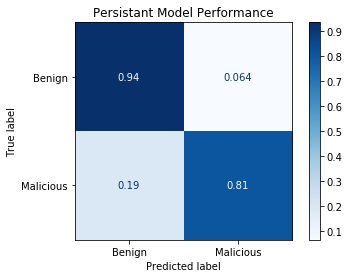

In [36]:
params = model.__dict__
model_params_loc = '/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/ml-demo-app/api/ml/models/model_params.json'
data_to_json(params, model_params_loc)

import json
import collections
from scipy import sparse
import matplotlib.pyplot as plt

for k, v in params.items():
    if isinstance(v, list) and v[-1:] == '_':
        params[k] = v.tolist()
        
fitted_date_enc = deserialize(DateEncoder(), json_to_data("", date_enc_loc))
fitted_cat_enc = deserialize(CategoryEncoder(), json_to_data("", cat_enc_loc))
fitted_scaler = DomainFeatureScaler(scaler_loc=scaler_loc, has_fit=True)

new_model = deserialize(SVC(), json_to_data("", model_params_loc))
y_pred=new_model.predict(x_test)

from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(new_model, x_test, y_test,
                                 display_labels=['Benign', 'Malicious'],
                                 cmap=plt.cm.Blues,
                                 normalize='true')
disp.ax_.set_title('Persistant Model Performance')
plt.show()

In [26]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.model_selection import train_test_split

pipe = Pipeline([
    ('model', SVC(probability=True))
])

svc_search = {
    'model': Categorical([SVC(probability=True)]),
    'model__C': Real(0.01, 100.0, 'log-uniform'),
    'model__kernel': Categorical(['poly', 'rbf']),
}

searchcv = BayesSearchCV(
    SVC(),
    search_spaces = {
        'C': Real(1e-6, 1e+6, prior='log-uniform'),
        'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
        'kernel': Categorical(['poly', 'rbf']),
    },
    n_iter=10,
    cv=cv,
    verbose=5,
    n_jobs=-1
)

def on_step(optim_result):
    score = searchcv.best_score_
    print(f'Best score: {score}')
    if score >= 0.98:
        print('Interrupting!')
        return True
    
import time
start_time = time.time()

searchcv.fit(X_train, Y_train, callback=on_step)

print("--- %s seconds ---" % (time.time() - start_time))

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best score: 0.4843283582089552
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s


Best score: 0.8716417910447761
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


Best score: 0.8716417910447761
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best score: 0.8716417910447761
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s


Best score: 0.8716417910447761
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s


Best score: 0.8716417910447761
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best score: 0.8716417910447761
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Best score: 0.8716417910447761
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


Best score: 0.8716417910447761
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished


Best score: 0.8716417910447761
--- 6.424937009811401 seconds ---


In [28]:
y_pred = searchcv.predict(x_test)
print(f'TPR: {tpr(y_test, y_pred)}\nTNR: {tnr(y_test, y_pred)}\nFPR: {fpr(y_test, y_pred)}\nFNR: {fnr(y_test, y_pred)}')
print(f'Best params found: {searchcv.best_params_}')

bayesian_model_loc='/Users/chrismclearnon/Developer/QUB-CSC3032-FYP/src/ml-demo-app/api/ml/models/bayesian_svc_model.json'
data_to_json(searchcv.best_estimator_.__dict__, bayesian_model_loc)

TPR: 0.8078078078078078
TNR: 0.9388379204892966
FPR: 0.06116207951070336
FNR: 0.1921921921921922
Best params found: {'C': 6167.440671107427, 'gamma': 0.11442588109764625, 'kernel': 'rbf'}


'{\n    "decision_function_shape": "ovr",\n    "break_ties": false,\n    "kernel": "rbf",\n    "degree": 3,\n    "gamma": 0.11442588109764625,\n    "coef0": 0.0,\n    "tol": 0.001,\n    "C": 6167.440671107427,\n    "nu": 0.0,\n    "epsilon": 0.0,\n    "shrinking": true,\n    "probability": false,\n    "cache_size": 200,\n    "class_weight": null,\n    "verbose": false,\n    "max_iter": -1,\n    "random_state": null,\n    "_sparse": true,\n    "class_weight_": {\n        "py/numpy.ndarray": {\n            "values": [\n                1.0,\n                1.0\n            ],\n            "dtype": "float64"\n        }\n    },\n    "classes_": {\n        "py/numpy.ndarray": {\n            "values": [\n                0,\n                1\n            ],\n            "dtype": "int64"\n        }\n    },\n    "_gamma": 0.11442588109764625,\n    "support_": {\n        "py/numpy.ndarray": {\n            "values": [\n                18,\n                20,\n                28,\n              

In [29]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_scores = searchcv.decision_function(x_test)
p, r, thresholds = precision_recall_curve(y_test, y_scores)

def adjust_classes_to_threshold(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    adjusted_y_pred = adjust_classes_to_threshold(y_scores, t)
    
    print(pd.DataFrame(confusion_matrix(y_test, adjusted_y_pred),
                      columns=['Pred_neg', 'Pred_pos'],
                      index=['neg', 'pos']))
    
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    close_default_clf = np.argmin(np.abs(thresholds-t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k', markersize=15)

     Pred_neg  Pred_pos
neg       307        20
pos        64       269


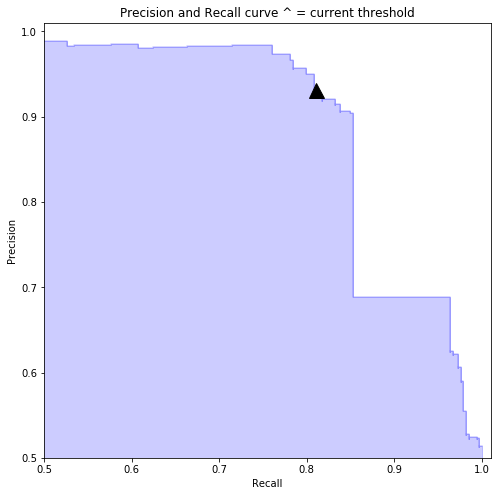

In [30]:
precision_recall_threshold(p, r, thresholds, 0.10)

In [31]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

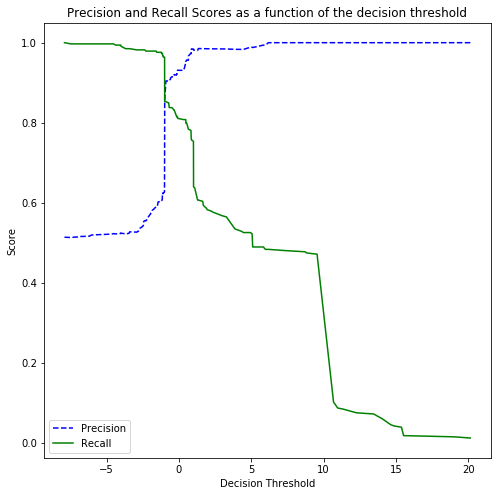

In [32]:
plot_precision_recall_vs_threshold(p, r, thresholds)

In [33]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')


0.9248193147275716


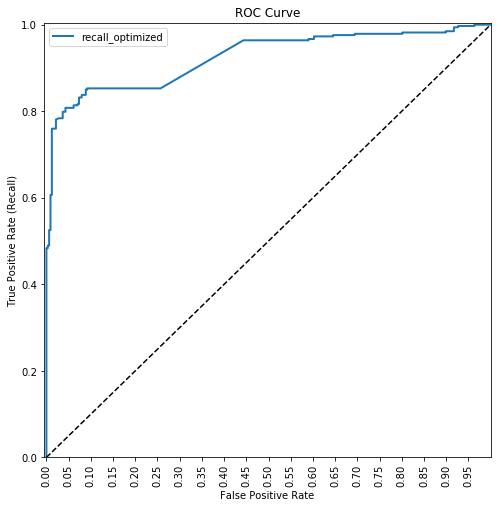

In [34]:
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')